In [1]:

import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)



iris = pd.read_csv('https://raw.githubusercontent.com/bgrogers/knn_example/main/iris_data.csv')


## EDA

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


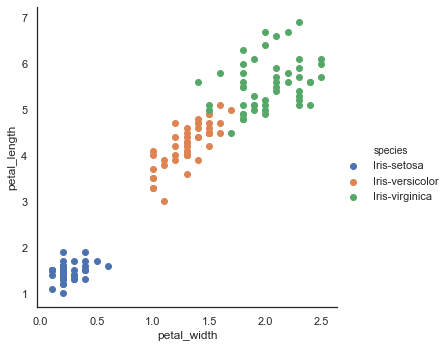

In [4]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "petal_width", "petal_length") \
   .add_legend()

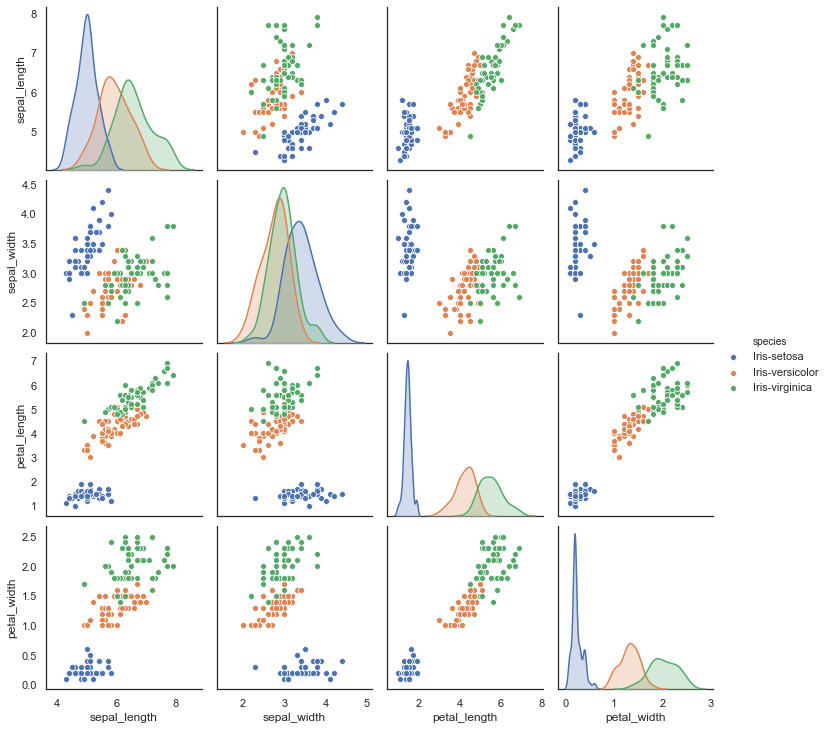

In [5]:

sns.pairplot(iris, hue = 'species')
plt.show()

## KNN

#### Scaling Data

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(iris.drop(["species"],axis = 1),),
        columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [7]:
y = iris.species

In [8]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42, stratify=y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,100):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
## score that comes from testing on the same datapoints that 

In [10]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [11]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.0 % and k = [7, 9, 10, 11, 13, 14, 15]


In [12]:
#finding error rates
error_test = [1-x for x in test_scores]
error_train = [1-x for x in train_scores]

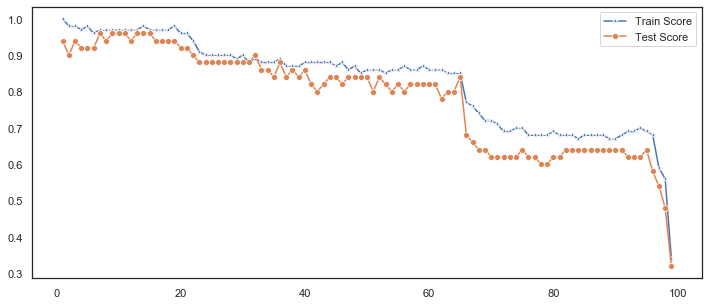

In [13]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,100),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,100),test_scores,marker='o',label='Test Score')

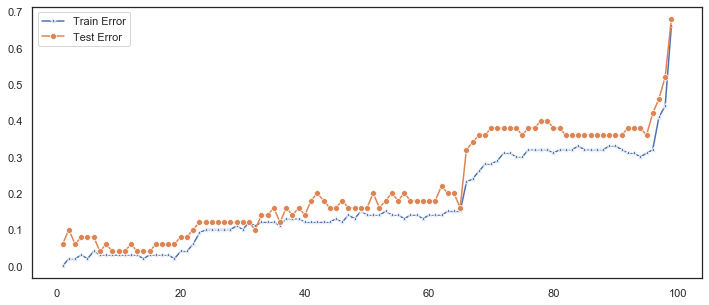

In [14]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,100),error_train,marker='*',label='Train Error')
p = sns.lineplot(range(1,100),error_test,marker='o',label='Test Error')

### Optimal K via Square Root of N

In [15]:
np.sqrt(150)

12.24744871391589

In [21]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.94

In [23]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.96

In [24]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,16,0,0,16
Iris-versicolor,0,17,0,17
Iris-virginica,0,2,15,17
All,16,19,15,50


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Confusion matrix : \n' + str(confusion_matrix(y_test, y_pred)))
print('Accuracy score : \n' + str(accuracy_score(y_test, y_pred)))

Confusion matrix : 
[[16  0  0]
 [ 0 16  1]
 [ 0  4 13]]
Accuracy score : 
0.9


## LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

model = lda.fit(X_train, y_train)
pred = model.predict(X_test)

print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

0.98
[[16  0  0]
 [ 0 17  1]
 [ 0  0 16]]


## QDA

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

model2 = qda.fit(X_train, y_train)
pred2 = model2.predict(X_test)

print(accuracy_score(pred2, y_test))
print(confusion_matrix(pred2, y_test))

0.98
[[16  0  0]
 [ 0 17  1]
 [ 0  0 16]]
